In [2]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False

import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import RMSprop
from mpl_toolkits.mplot3d import Axes3D

import mglearn
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout

Using TensorFlow backend.


### 데이터 분리

1. 수질데이터만 돌릴 경우 정확도 73~75
2. 수질데이터 + 쓰레기, 폐수 데이터 80~81
3. 2에서 수질계산에 사용되지 않는 항목을 제거 

In [3]:
df = pd.read_csv('../../data/team/predict_data3.csv',encoding = 'ANSI')
# 정규화
mini = df.loc[:,'저층수온':].min()
maxi = df.loc[:,'저층수온':].max()
df.loc[:,'저층수온':] = (df.loc[:,'저층수온':] - mini)/(maxi-mini)

a1 = df[df['해수수질기준']==1].sample(248)
a2 = df[df['해수수질기준']==2].sample(248)
a3 = df[df['해수수질기준']==3].sample(248)
a4 = df[df['해수수질기준']==4].sample(248)
a5= df[df['해수수질기준']==5]
a5 = pd.concat([a1,a2,a3,a4,a5])
df = a5

# 데이터셋 분할
x = df.iloc[:,3:]
y = df.iloc[:,2]
Y = pd.get_dummies(y).values
x_train, x_test, y_train, y_test = train_test_split(x, Y , test_size = 0.3,
                                                    random_state = 1)

In [6]:
list(x_train.columns)

['저층수온',
 '저층염분',
 '저층DO',
 '표층DIN',
 '표층DIP',
 '표층Chl-a',
 '표층투명도',
 '수거량',
 '수거량2',
 '정화면적',
 '일별처리량',
 '시설용량(톤/일)(A)',
 '방류BOD(mg/L)평균',
 '평균\n처리효율\n(%)',
 '방류COD(mg/L)평균',
 '방류SS(mg/L)평균',
 '방류T-N(mg/L)평균',
 '방류T-P(mg/L)평균',
 '방류대장균군수(개/mL)평균']


### 모델링


In [ ]:
# 모델생성

model = Sequential()
model.add(Dense(200,input_shape=(19,), activation = 'relu'))
model.add(Dropout(0.2)) 
model.add(Dense(200, activation = 'relu'))
model.add(Dropout(0.2)) 

model.add(Dense(5 , activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

hist= model.fit(x_train, y_train, epochs=250)

In [13]:
# 모델평가
loss, accuracy = model.evaluate(x_test, y_test)
print('정확도 = {:.2f}'.format(accuracy))
print('손실 = {:.2f}'.format(loss))

372/372 [==============================] - 0s 133us/step
정확도 = 0.76
손실 = 0.75


372/372 [==============================] - 0s 164us/step


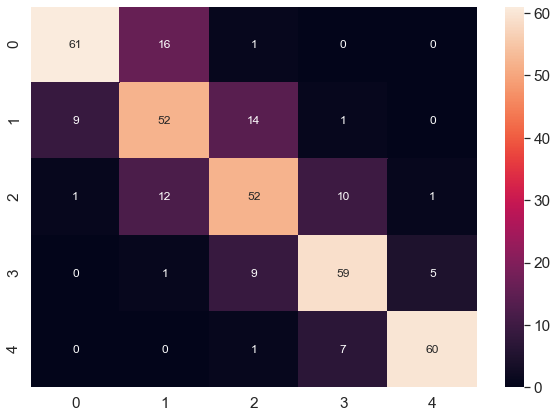

In [14]:
Y_pred = model.predict(x_test, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
df_cm = pd.DataFrame(cm, range(5), range(5))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={'size':12})
plt.show()

# 수질지수에 사용되는 요인이 포함된 데이터로 돌렸는데 75 % 정도 정확도가 나옴
# 히트맵으로 볼 시 오차도 자신보다 1,2단계 낮은 수질로 일부 나오나 극단적으로 못맞추는
# 경우는 없음

In [15]:
model.save('predict_data3.h5')

In [11]:
model = keras.models.load_model('../flask/model/predict_data3.h5')